In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants

plt.style.use('scandic')

# 2D Ising model

## Part a

With provided code, running the 2D ising model with given params:

```
Config file. First line is ignored, and order is important (only the value is read from each line)
20        lattice size (everything after the value is ignored)
2.1       temperature
500       ntskip (thinning factor)
2000      ntjob (number of passes)
T         use random initial config (use T or F, all up if F)
42        RNG seed (usually safe to leave as-is)
```

output in the [11_a_opt.dat](11_a_opt.dat) file.

```
 # Average magnetization per spin:   0.58012999974191193 
```

/var/folders/xk/1__wtv4d77dg6j4_ypxwxc6m0000gp/T/ipykernel_95118/3805875210.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('11_a_opt.dat', sep = 5*' ', header=None, skipfooter=1)


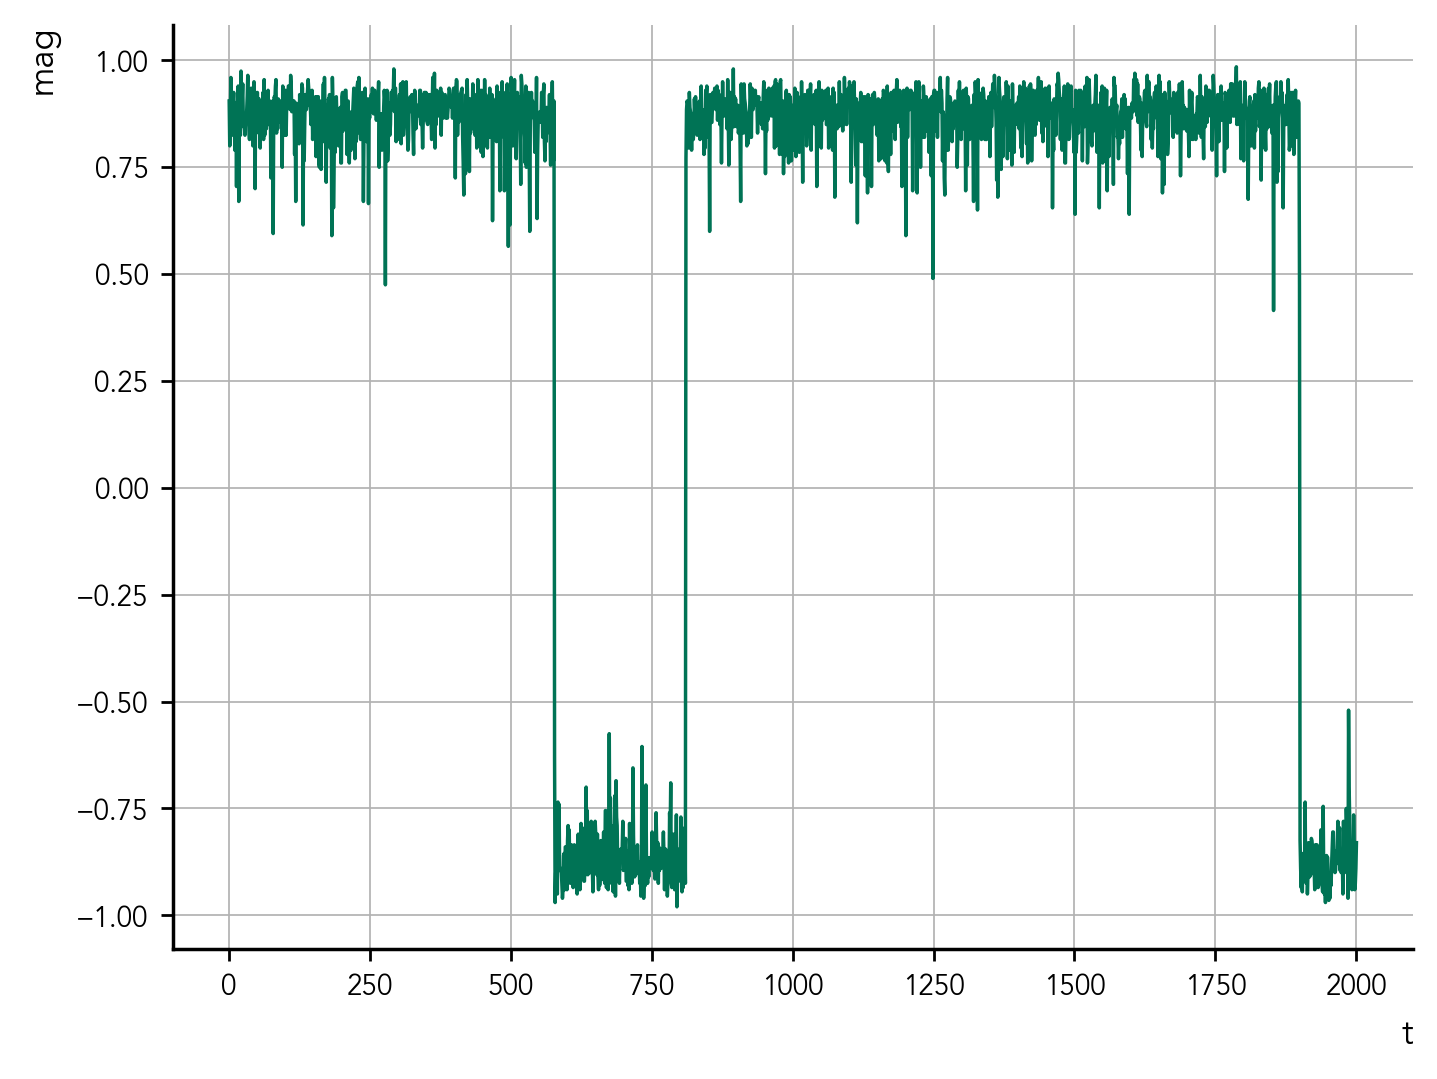

In [2]:
data = pd.read_csv('11_a_opt.dat', sep = 5*' ', header=None, skipfooter=1, engine='python')
# name columns
data.columns = ['t', 'mag']

size = 20**2

# plot
plt.plot(data['t'], data['mag']/size)
plt.xlabel('t')
plt.ylabel('mag')
plt.show()


## Part b

Running on 40x40 lattice at var temperatures.

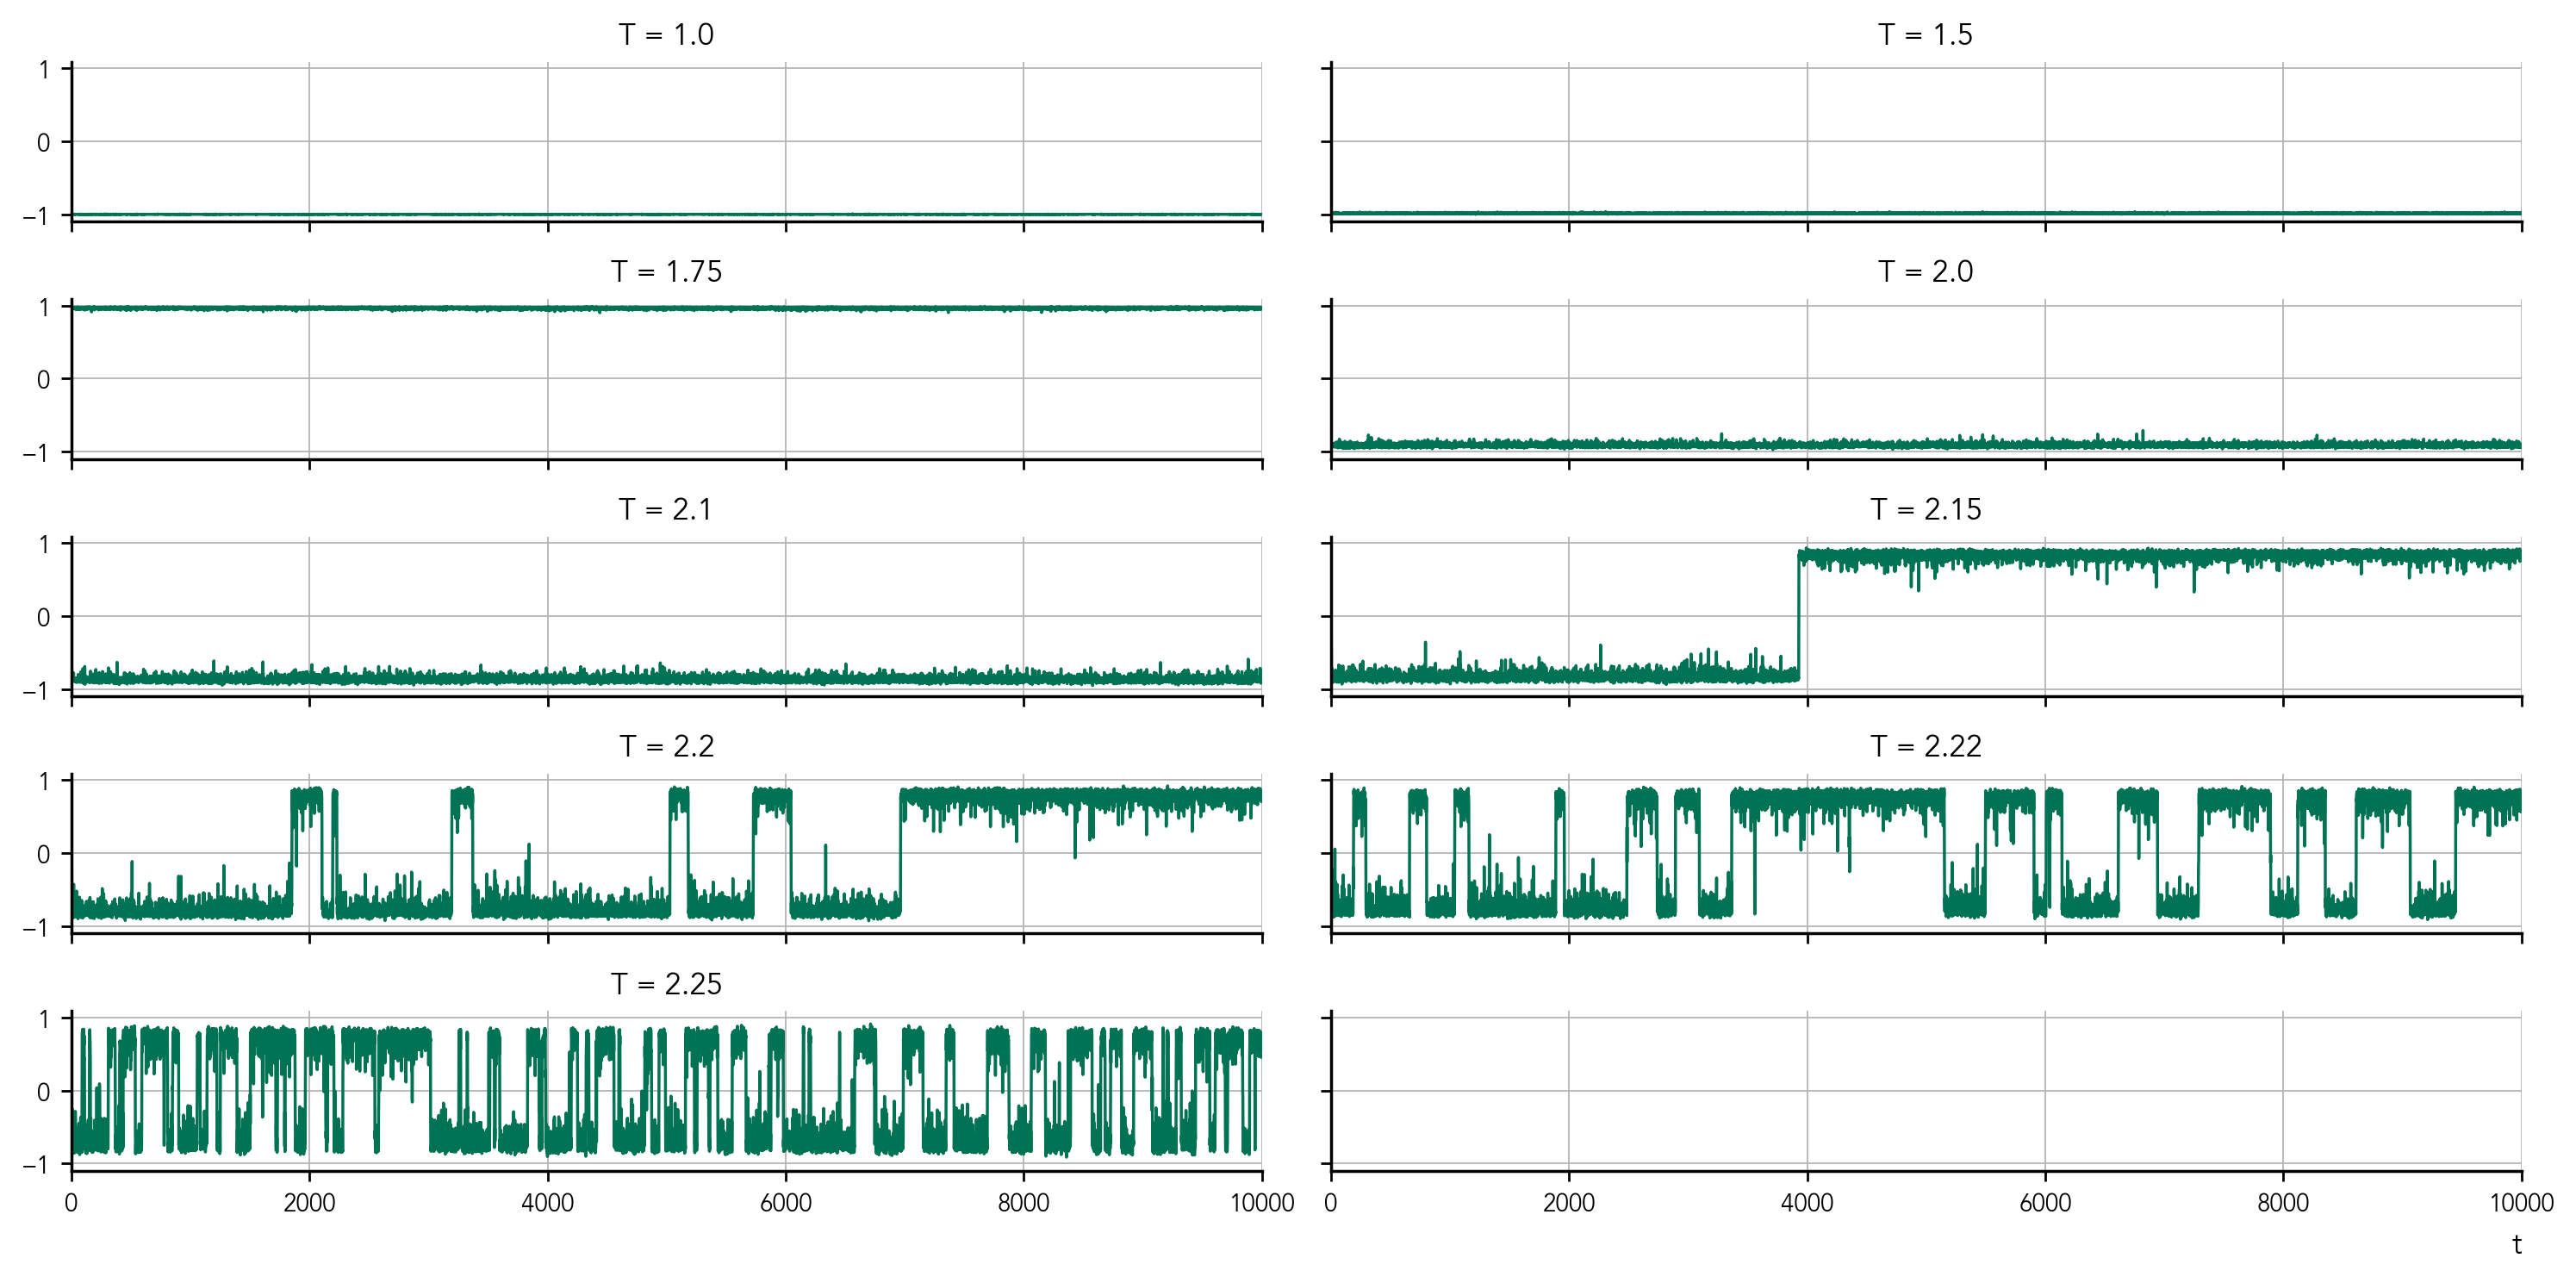

In [20]:
temps = [1.0, 1.5, 1.65, 1.75, 1.85, 2.0, 2.1, 2.25]
temps = [1.0, 1.5, 1.75, 2.0, 2.1, 2.15, 2.2, 2.22, 2.25]

size = 40**2

fig, axs = plt.subplots(np.ceil(len(temps)/2).astype('int'), 2, figsize=(12, 6), sharex=True, sharey=True)

for temp, ax in zip(temps, axs.flatten()):
    file_name = '11_b_' + str(temp) + '.dat'
    # print(file_name)
    data = pd.read_csv(file_name, sep = 6*' ', header=None, skipfooter=1, engine='python')

    # name columns
    data.columns = ['t', 'mag']

    # plot
    ax.plot(data['t'], data['mag']/size, label='T = ' + str(temp))
    ax.set_title('T = ' + str(temp))

plt.xlim(0, 10000)
plt.xlabel('t')
plt.tight_layout()
plt.show()


/var/folders/xk/1__wtv4d77dg6j4_ypxwxc6m0000gp/T/ipykernel_95118/2732996336.py:18: RuntimeWarning: invalid value encountered in power
  m = (1 - np.sinh(2/(temp_arr_to_plot))**(-4))**(1/8)


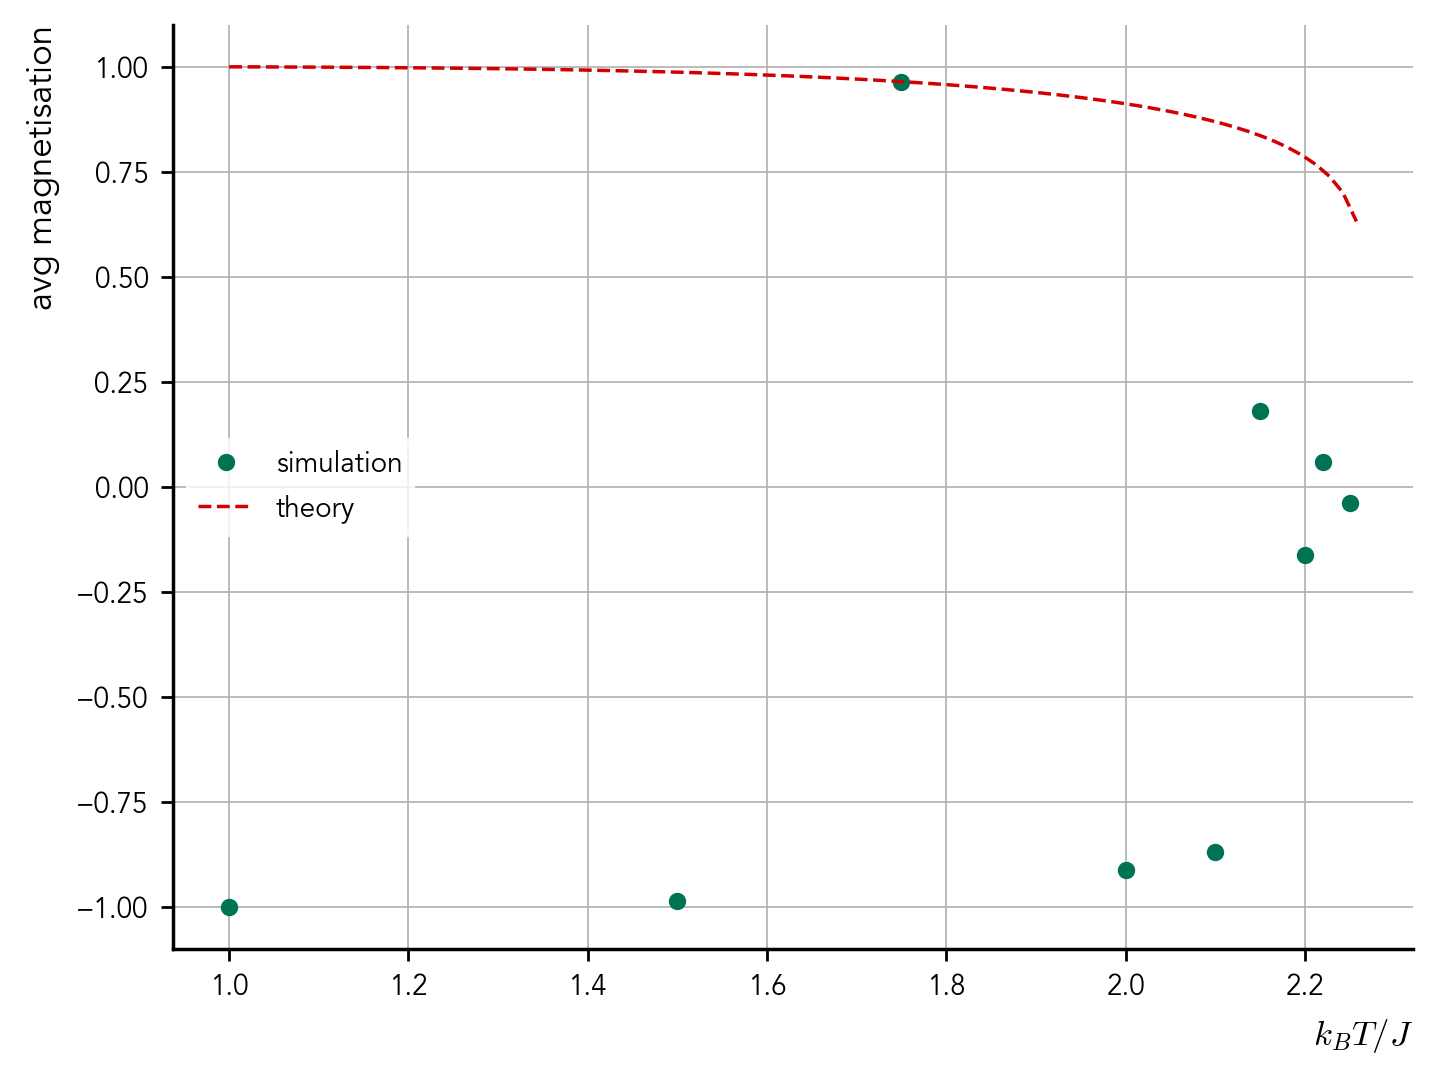

In [12]:
avg_mag = []

for temp in temps:
    file_name = '11_b_' + str(temp) + '.dat'
    # read last line from the text file
    with open(file_name, 'r') as f:
        last_line = f.readlines()[-1]
        # print(last_line)
        # split by ':' and take the second element
        avg_mag.append(float(last_line.split(':')[1]))

#plot
plt.plot(temps, avg_mag, 'o', label='simulation')
plt.xlabel('$k_B T / J$')
plt.ylabel('avg magnetisation')

temp_arr_to_plot = np.linspace(1.0, 2.5, 100)
m = (1 - np.sinh(2/(temp_arr_to_plot))**(-4))**(1/8)
plt.plot(temp_arr_to_plot, m, '--', label='theory')
plt.legend()
plt.show()


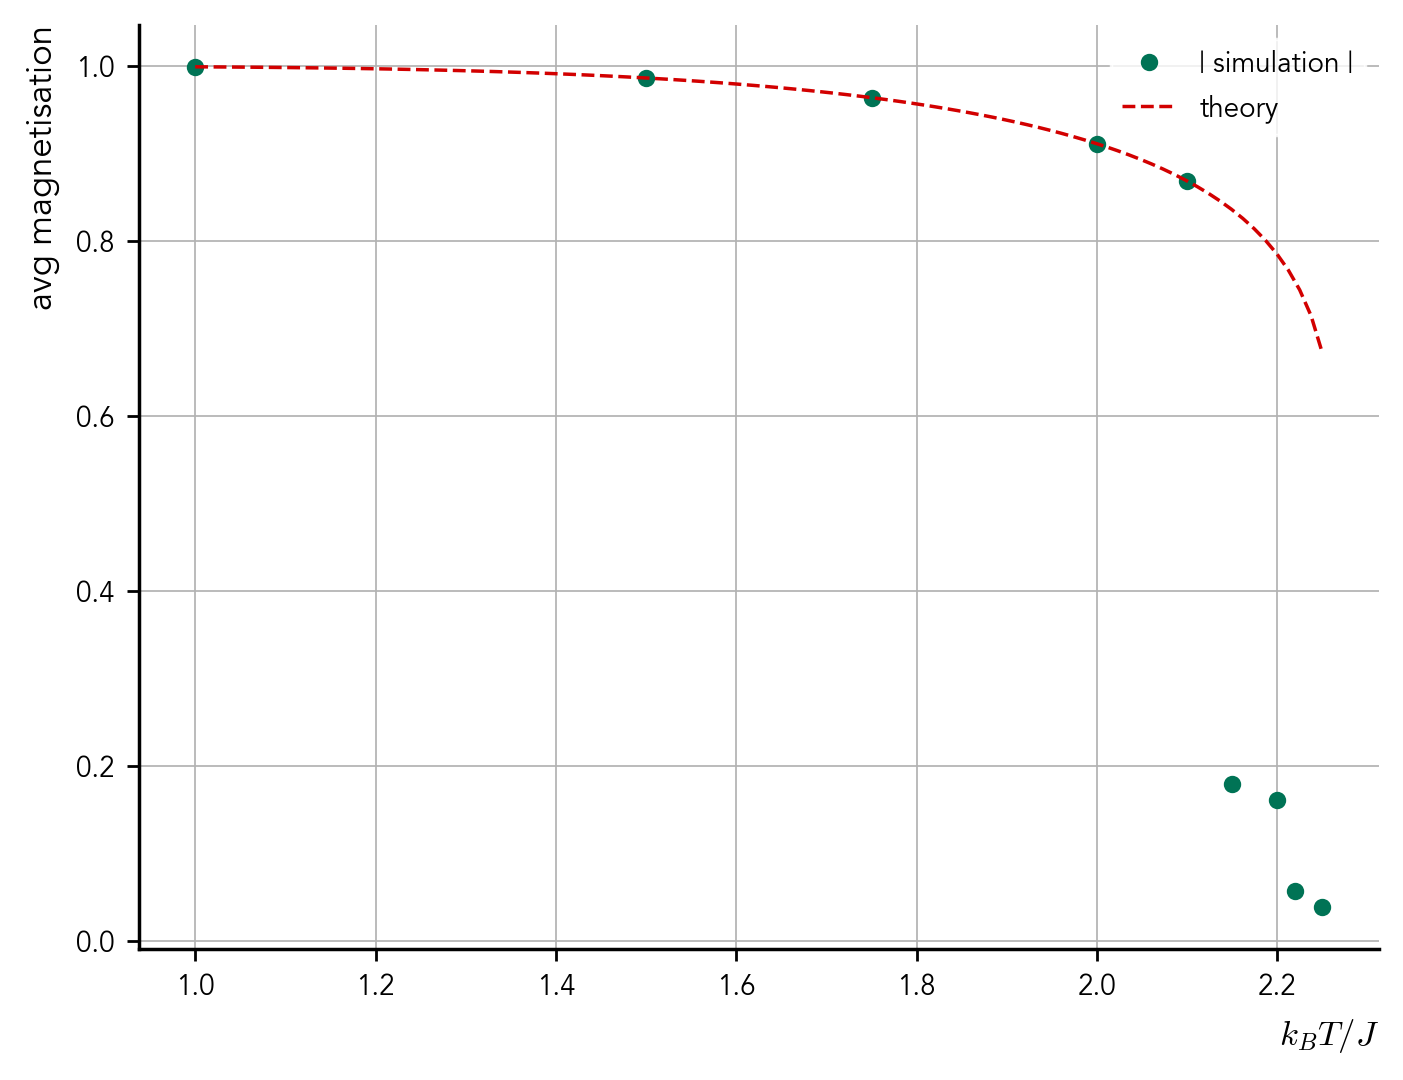

In [23]:
avg_mag = []

for temp in temps:
    file_name = '11_b_' + str(temp) + '.dat'
    # read last line from the text file
    with open(file_name, 'r') as f:
        last_line = f.readlines()[-1]
        # print(last_line)
        # split by ':' and take the second element
        avg_mag.append(float(last_line.split(':')[1]))

#plot
plt.plot(temps, np.abs(avg_mag), 'o', label='| simulation |')
plt.xlabel('$k_B T / J$')
plt.ylabel('avg magnetisation')

temp_arr_to_plot = np.linspace(1.0, 2.25, 100)
m = (1 - np.sinh(2/(temp_arr_to_plot))**(-4))**(1/8)
plt.plot(temp_arr_to_plot, m, '--', label='theory')
plt.legend()
plt.show()
